# Chapter 2: Multi-armed Bandit
![a-multiarm-bandit](figs/02-multiarm-bandit.png)
* (photo reference: Cartoonist Hagen @ [https://www.hagencartoons.com](https://www.hagencartoons.com))
* Or, a better **bandit style** illustration of a multi-armed bandit:
![a-multiarm-bandit](figs/02-b-multiarm-bandit.gif)


* The **multi-armed bandit problem** (sometimes called the $K$- or $N$-armed bandit problem):
    - It is a problem in which a fixed limited set of resources must be allocated between competing (alternative) choices in a way that maximizes their expected gain, when each choice's properties are only partially known at the time of allocation, and may become better understood as time passes or by allocating resources to the choice. ([Wiki](https://en.wikipedia.org/wiki/Multi-armed_bandit))
    - In other words(1): how to take action ``wisely`` in a game with an opponent as you learn to know her/his moves as you continue to play?
    - In other words(2): [how to choose between multiple restaurants ``wisely`` in a town you are visiting for a short time (ofcourse without the Yelp or prior reviews) to make you the most satisfied each day?](https://youtu.be/e3L4VocZnnQ)?
    - In other words(3): how to choose courses ``wisely`` in CS to be rewarded the most later after graduation?
    - and so on ...
    - I hope you got the problem.

* **History of the name ``multi-armed bandit``**:
    * The name comes from imagining a **gambler** (and hence the mask around the eyes) at a row of slot machines (sometimes known as `one-armed bandits`), who has to decide which machines to play, how many times to play each machine and in which order to play them, and whether to continue with the current machine or try a different machine to earn the most money!

## Goal of this chapter
![the-agent-environment-loop](figs/02-c-agent-environment-loop.png)
* Understanding a reinforcement learning problem  
    - in perspective of a ``multi-armed bandit`` problem
    - in perspective of a ``contextual bandit`` problem
* Exploration- Expoitation tradeoff
    - How we learn value functions
    - Greedy action selection
    - $\varepsilon$-Greedy selection
    - Upper Confidence Bound (UCB)
    - Gradient Bandits

## $k$-armed bandits
![a-multiarm-bandit](figs/02-b-multiarm-bandit.gif)
* Say, the bandit gets cash/coins (of differing values) as reward once it presses a button (one of the six: A, B, C, D, E, F)
* The bandit need to choosing which of the six buttons to push to get the maximum reward.
* The ``reward distribution`` can be stationary or non-stationary.
    - Does the reward of pressing the button `B` change over time? 

## Maximizing the Reward
* Through repeated actions you maximize your winning by pressing the `best` buttons?
* How to find the `best` buttons?
* Estimating values of each action (below: sample-average method)
    - Averaging the rewards actually received up-until now:

$$
\begin{array}
\nonumber Q_t(a) &=& \dfrac{\text{sum of rewards when action $a$ taken prior to timestep $t$}}{\text{number of times action $a$ taken prior to timestep $t$}}\\
\nonumber &=& \dfrac{\sum_{i=1}^{t-1} R_i \cdot \mathbb{1}_{A_i=a}}{\sum_{i=1}^{t-1}\mathbb{1}_{A_i=a}}
\end{array}
$$
where,
* $\mathbb{1}_{A_i=a}$ denotes this becomes 1 when $A_i=a$, otherwise 0.
* $a$ is the action from a set of actions, i.e, the action space, $A$. In our case, that is pressing one of the six buttons: {A, B, C, D, E, F}
* $R_i$ is the reward (i.e., cash dispensed) when the bandit pressed the button, $a$, at timestep $i$.

* *Of course this is just one way to estimate action values, and not necessarily the best one.*


## Greedy action selection rule
* Select one of the actions with the highest estimated $Q$ value, i.e, 

$$
A_t = \underset{a}{\text{argmax}}\quad Q_t(a)
$$
where, $\underset{a}{\text{argmax}}$ denotes the action $a$ for which the expression that follows is maximized.

* Greedy action selection always exploits current knowledge to maximize immediate reward;
    - it spends no time at all sampling apparently inferior actions to see if they might really be better.

## $\varepsilon$-Greedy action selection

* A simple alternative to being greedy all the time is:
    - Behave greedily most of the time, but every once in a while (say, with small probability, $\varepsilon$), instead select an action with uniform probability.
* As the number of steps increases, every action will be sampled an infinite number of times.
    - This ensures that all the $Q_t(a)$ converges to $q_*(a)$ (i.e., optimal).
    - Ofcourse, this implies that the probability of selecting the optimal action converges to a value greater than $ (1-\varepsilon)$.

## Exercise (a)
In $\varepsilon$-greedy action selection, for the case of two actions and $\varepsilon=0.5$, what is the probability that the greedy action is selected?


### Solution to exercise (a)
* Say, $G$ is a binary variable denoting ``greedy action`` is taken.
* $R$ is a binary variable denoting ``an action is taken randomly with uniform probability``.
* By definition: $P(R) = 0.5 = \varepsilon$, and so $P(\bar{R}) = 1-0.5 = 0.5$
* $P(G) = ?$

$$
\begin{array}
\nonumber P(G)  &=& P(\text{prior action was taken greedily}) + P(\text{prior action was taken randomly})\\
\nonumber &=& P(G|\bar{R})P(\bar{R}) + P(G|R)P(R)\\
\nonumber &=& 1 \cdot 0.5 + \dfrac{1}{2}\cdot 0.5\\
\nonumber &=& 0.75
\end{array}
$$
* Please note, 
    - $P(G|\bar{R})$ = 1 because the agent was certain (i.e., 100%) about the action to take.
    - $P(G|R) = \dfrac{1}{2}$, as there are 2 actions to choose from (uniformly)

## Efficient Sample-averaging
* Constant memory and constant per-time-step computation
* Let, $R_i$ denotes the reward received after the $i$-th timestep of taking an action.
* $Q_n$ denote the estimate of its action value after it has been selected $n-1$ times:
$$
Q_n = \dfrac{R_1 + R_2 + \cdots + R_{n-1}}{n-1}
$$
* An obvious implementation of the above would be
    - maintain a record of all rewards and perform the computation whenever the estimate is needed.
    - Unfortunately, this will cause memory and computation requirements to grow over time as more rewards are seen.
* Good news! This is not really necessary
    - It is easy to devise an ``incremental formula`` to compute running averages for $Q_n$
$$
\begin{array}
\nonumber Q_{n+1} &=& \dfrac{1}{n}\sum_{i=1}^nR_i\\
\nonumber &=& \dfrac{1}{n}\left( R_n + \sum_{i=1}^{n-1}R_i\right)\\
\nonumber &=& \dfrac{1}{n}\left( R_n + (n-1)\dfrac{1}{n-1}\sum_{i=1}^{n-1}R_i\right)\\
\nonumber &=& \dfrac{1}{n}\left( R_n + (n-1)Q_n\right)\\
\nonumber &=& \dfrac{1}{n}\left( R_n + nQ_n-Q_n\right)\\
\nonumber &=& Q_n + \dfrac{1}{n}\left( R_n - Q_n\right)\\
\end{array}
$$

###  Example (Running, (or moving) average)
* Given $n$, list of (streaming) numbers... ideally an infinite stream of numbers.
* After taking a number from the stream, print the moving average.
* Condition: constant memory and constant per-time-step computation.

In [5]:
import random
n = 10
Q_n = 0 #initially, the average is zero for n=0

for i in range(1,n+1):
    #step 1: take the number
    R_n = random.randint(0,15)
    #step 2: calculate moving average
    Q_n = Q_n + (1.0/i)*(R_n - Q_n)
    #step 3: print the moving average
    print(f'After input R_({R_n}), the moving average, Q({i}) = {Q_n}')




After input R_(8), the moving average, Q(1) = 8.0
After input R_(4), the moving average, Q(2) = 6.0
After input R_(13), the moving average, Q(3) = 8.333333333333332
After input R_(13), the moving average, Q(4) = 9.5
After input R_(11), the moving average, Q(5) = 9.8
After input R_(0), the moving average, Q(6) = 8.166666666666668
After input R_(8), the moving average, Q(7) = 8.142857142857144
After input R_(10), the moving average, Q(8) = 8.375000000000002
After input R_(15), the moving average, Q(9) = 9.111111111111112
After input R_(5), the moving average, Q(10) = 8.700000000000001


* The update rule will occur frequently throughtout this course:
$$
Q_{n+1} = Q_n + \dfrac{1}{n}\left( R_n - Q_n\right)
$$

* The general idea is:
$$
\text{NewEstimate} \leftarrow \text{OldEstimate} + \text{StepSize}\cdot[\text{Target} - \text{OldEstimate}]
$$
* The expression $[\text{Target} - \text{OldEstimate}]$ is an error estimate.
    - This error is reduced by taking a step toward the ``Target``.
    - The target is presumed to indicate a desirable direction in which to move.
    - In the moving/running average example above, the target, $R_n$ is the $n$-th reward, the $n$-th input received.
* Also note that,
    - the $\text{StepSize}$ parameter changes from timestep to timestep.
    - In processing the $n$-th reward for action $a$, the method uses the stepsize $\dfrac{1}{n}$.
    - Often, this $\text{StepSize}$ parameter will be denoted by $\alpha$

## Pseudocode for a complete bandit algorithm
* Here, the fundtion ``bandit(a)`` is assumed to taken an action and return a corresponding reward.
![complete bandit algorithm](figs/02-d-a-simple-bandit-algorithm.png)


In [7]:
import numpy as np
def argmax_rand(arr):
    # break ties randomly, np.argmax() always picks first max
    return np.random.choice(np.flatnonzero(arr == arr.max()))

In [9]:
#The function following the pseudocode
def simple_bandit(env, nb, eps):
    Q = np.zeros(env.size)
    N = np.zeros(env.size)
    
    for _ in range(nb):
        A = argmax_rand(Q) if np.random.rand() > eps else np.random.randint(env.size)            
        R = env.step(A) #bandit(A)
        N[A] = N[A] + 1                
        Q[A] = Q[A] + (1/N[A]) * (R - Q[A])
        
    return Q

### The environment

In [10]:
class BanditEnv:
    def __init__(self):
        """10-armed testbed, see chapter 2.3"""
        self.size = 10                                        # 10 arms
        self.means = np.array([0.25, -0.75, 1.5, 0.5, 1.25,   # eyeball fig 2.1
                               -1.5, -0.25, -1, 0.75, -0.5])
    def step(self, action):
        return np.random.normal(loc=self.means[action])

### The bandit algorithm (slight modification)
* with history logging so to re-create the 10-armed testbed experiment in SB-2.3

In [11]:
def simple_bandit(env, nb, eps):
    hist_A = []
    hist_R = []
    
    Q = np.zeros(env.size)
    N = np.zeros(env.size)
    
    for _ in range(nb):
        A = argmax_rand(Q) if np.random.rand() > eps else np.random.randint(env.size)            
        R = env.step(A)    
        N[A] = N[A] + 1                
        Q[A] = Q[A] + (1/N[A]) * (R - Q[A])
        
        hist_A.append(A)
        hist_R.append(R)
        
    return Q, np.array(hist_A), np.array(hist_R)

### Recreating Figure 2.1: 10-armed bandit problem

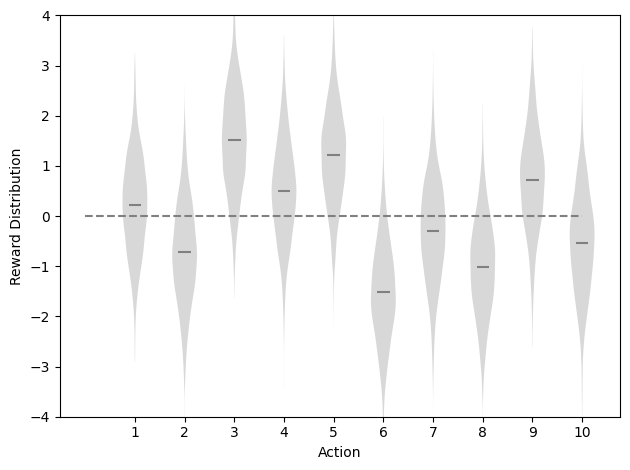

In [15]:
import matplotlib.pyplot as plt

num_of_k_armed_bandit_problems = 2000
k = 10

env = BanditEnv()

fig = plt.figure()
ax = fig.add_subplot(111)
parts = ax.violinplot(np.random.randn(num_of_k_armed_bandit_problems,k) + env.means,
                      showmeans=True, showextrema=False)
for pc in parts['bodies']: pc.set_facecolor('gray')
parts['cmeans'].set_color('gray')
ax.plot([0,k],[0,0], color='gray', linestyle='--')
ax.set_ylim([-4, 4])
ax.set_xlabel("Action"); ax.set_ylabel("Reward Distribution")
plt.xticks(np.arange(1, 10+1, 1))
plt.tight_layout()
plt.savefig('figs/02-e-recreating-sb-fig-2_1.png')
plt.show()

* For each bandit problem, the action values, $q_*(a)$, $a=1, 2, \cdots, 10$ were selected according to a Gaussian distribution with mean=0, variance=1.
* Then, when a learning method is applied, at timestep $t$, the actual reward, $R_t$ was selected from a Gaussian distribution with mean $q_*(A_t)$, and variance 1.
    - These distributions are shown in gray.
    - According to the 10-armed testbed experiment: pressing button `3` would be the best, and `6` would be the worst.

### Recreating Figure 2.2
* Average performance of $\varepsilon$-greedy actin-value methods on the 10-armed testbed.
* These dta are averages over 2000 runs with different bandit problems.

#### Generating some data

In [16]:
env = BanditEnv()

runs_ep0_A, runs_ep0_R = [], []      # eps=0, greedy
runs_ep01_A, runs_ep01_R = [], []    # eps=0.1
runs_ep001_A, runs_ep001_R = [], []  # eps=0.01

print('v' + ' '*18 + 'v')  # poor man tqdm
for i in range(2000):
    _, hist_A, hist_R = simple_bandit(env, nb=1000, eps=0)
    _, runs_ep0_A.append(hist_A); runs_ep0_R.append(hist_R);
    
    _, hist_A, hist_R = simple_bandit(env, nb=1000, eps=0.1)
    _, runs_ep01_A.append(hist_A); runs_ep01_R.append(hist_R); 
    
    _, hist_A, hist_R = simple_bandit(env, nb=1000, eps=0.01)
    _, runs_ep001_A.append(hist_A); runs_ep001_R.append(hist_R);
    
    if i % 100 == 0: print('.', end='')
    
runs_ep0_A, runs_ep0_R = np.array(runs_ep0_A), np.array(runs_ep0_R)
runs_ep01_A, runs_ep01_R = np.array(runs_ep01_A), np.array(runs_ep01_R)
runs_ep001_A, runs_ep001_R = np.array(runs_ep001_A), np.array(runs_ep001_R)

v                  v
....................

#### Calc average reward and % optimal action

In [17]:
# Calc average reward
avg_ep0_R = np.average(runs_ep0_R, axis=0)
avg_ep01_R = np.average(runs_ep01_R, axis=0)
avg_ep001_R = np.average(runs_ep001_R, axis=0)

# Calc "% optimal action"
max_A = np.argmax(env.means)
opt_ep0_A = np.average(runs_ep0_A==max_A, axis=0)
opt_ep01_A = np.average(runs_ep01_A==max_A, axis=0)
opt_ep001_A = np.average(runs_ep001_A==max_A, axis=0)

#### Now, plot (recreating Figure 2.2)

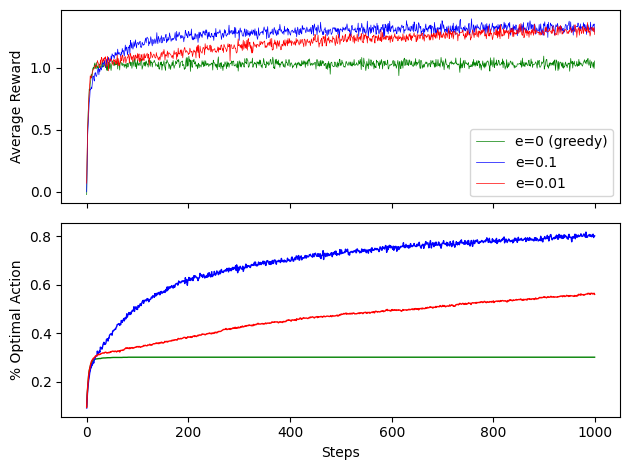

In [18]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(avg_ep0_R,   linewidth=0.5, color='green', label='e=0 (greedy)')
ax.plot(avg_ep01_R,  linewidth=0.5, color='blue',  label='e=0.1')
ax.plot(avg_ep001_R, linewidth=0.5, color='red',   label='e=0.01')
ax.set_ylabel('Average Reward')
ax.xaxis.set_ticklabels([])
ax.legend()

ax = fig.add_subplot(212)
ax.plot(opt_ep0_A,   linewidth=1., color='green', label='e=0 (greedy)')
ax.plot(opt_ep01_A,  linewidth=1., color='blue',  label='e=0.1')
ax.plot(opt_ep001_A, linewidth=1., color='red',   label='e=0.01')
ax.set_xlabel('Steps'); ax.set_ylabel('% Optimal Action')

plt.tight_layout()

plt.savefig('figs/02-f-recreating-sb-fig-2_2.png')
plt.show()

* Figure 2.2 compares a greedy method with two $\varepsilon$-greedy methods ($\varepsilon=0.01, \varepsilon=0.1$).
    - The upper graph shows the increase in expected reward with experience.
        - The greedy method improved slightly faster than the other methods at the very beginning, but then leveled off at a lower level. It achieved a reward-per-step of only about 1, compared with the best possible of about 1.55 on this 10-armed bandit testbed.
    - The lower graph shows that the greedy method found the optimal action in only approximately one-third of the tasks. In the other two-thirds, its initial samples of the optimal action were disappointing, and it never returned to it.
* The $\varepsilon$-greedy methods eventually performed better because they continued to explore and to improve their chances of recognizing the optimal action.
* $\varepsilon=0.1$  method explored more, and usually found the optimal action earlier, but it never selected that action more than 91% of time.
* $\varepsilon=0.01$  improved more slowly, but eventually would perform better than the $\varepsilon=0.1$ method on both performance measures shown in the figure.
* It is also possible to reduce $\varepsilon$ over time to try to get the best of both high and low values for $\varepsilon$ 